# Q-learning

## Nombre:

- **Ibarra Calderón Luis Alberto**  
- **Soliz Ortega David Franz**

In [2]:
from snake_v1 import SnakeEnv
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt


In [3]:
# Generar todos los posibles estados (food_dir: 2, danger: 4 => 6 features con valores en {-1, 0, 1})
all_states = list(itertools.product([-1, 0, 1], repeat=6))
Q = {state: [0] * 4 for state in all_states}


In [4]:
env = SnakeEnv()
episodes = 5000
alpha = 0.1
gamma = 0.9
epsilon = 0.1
scores = []

for episode in range(episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        # Política epsilon-greedy
        if random.uniform(0, 1) < epsilon:
            action = random.choice(env.actions)
        else:
            action = np.argmax(Q[state])

        next_state, reward, done = env.step(action)
        total_reward += reward

        # Actualización Q-learning
        old_value = Q[state][action]
        next_max = max(Q[next_state])
        Q[state][action] = old_value + alpha * (reward + gamma * next_max - old_value)

        state = next_state

    scores.append(env.score)


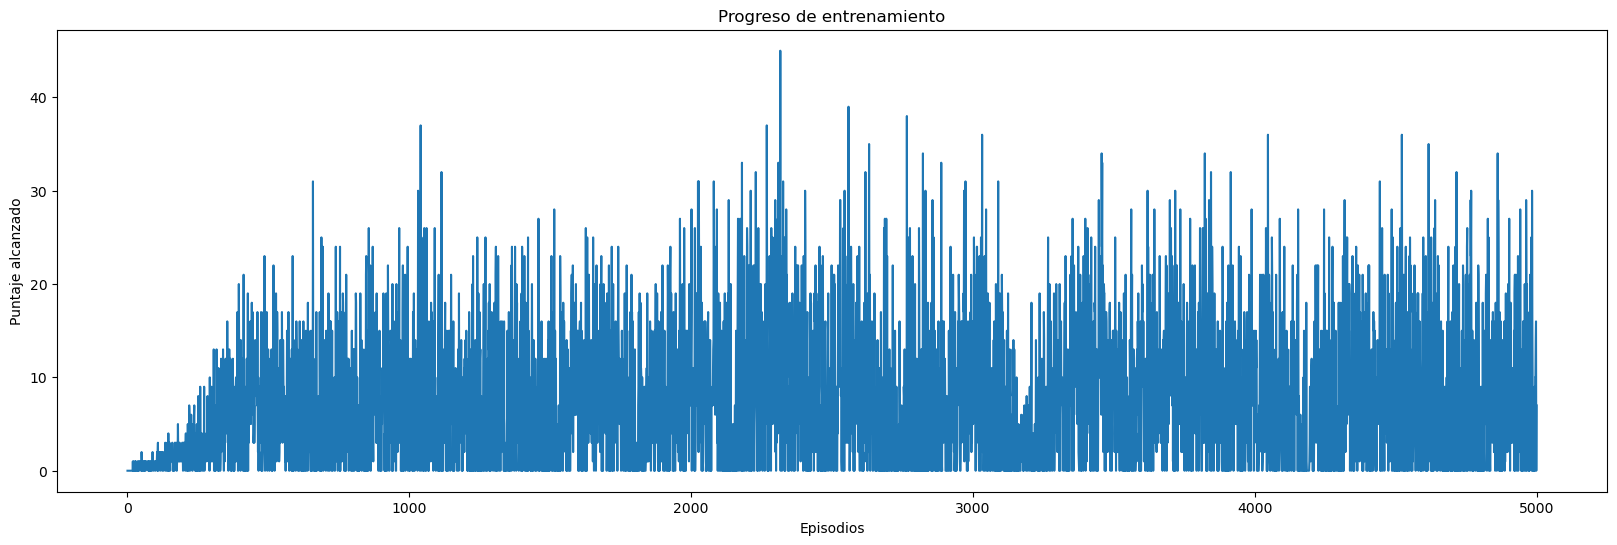

In [5]:
plt.figure(figsize=(20, 6))  # Cambia el tamaño a tu gusto
# Graficar progreso de entrenamiento
plt.plot(scores)
plt.xlabel("Episodios")
plt.ylabel("Puntaje alcanzado")
plt.title("Progreso de entrenamiento")
plt.show()

In [6]:
# Reproducir visualmente el agente entrenado con Pygame
import pygame
env = SnakeEnv()
state = env.reset()
done = False

while not done:
    pygame.event.pump()  # Evita que la ventana se congele
    action = int(np.argmax(Q[state]))
    state, reward, done = env.step(action)
    env.render()
    pygame.time.delay(100)

pygame.quit()
print("Puntaje final alcanzado:", env.score)



Puntaje final alcanzado: 52
